### 1.- 
Realice un programa que encuentre todas las raíces de una función en un intervalo cerrado bajo la
suposición de que la función realiza oscilaciones y entre cada oscilación hay al menos una raíz. Ponga
en práctica esta función y encuentre todas las raíces de la siguiente función $y(x)=cos(x)+\frac{6}{5}sin(x^2)$ en el intervalo $(0, 2\pi)$.

In [20]:
from pylab import *
%matplotlib inline

In [21]:
def raiz_bip(func,x_i,x_d,err=1e-5): 
    raiz=0.5*(x_i+x_d) #punto medio
    y_i,y_d=func(x_i),func(x_d)
    while abs(raiz-x_d)>=err and abs(y_i-y_d)>=err : #error sobre el eje x, abs(raiz-x_d)=>=err  encuentra el cero del error
        y_m=func(raiz)
        if y_m==0:
            print "raiz exacta"
            break
        if y_m*y_i<0:
            x_d=raiz
        else:
            x_i=raiz
        raiz=0.5*(x_i+x_d)
        y_i,y_d=func(x_i),func(x_d)
    return raiz

In [22]:
def f(x):
    return cos(x)+(6/5)*sin(x**2)
def df(x):
    return -sin(x)+(6/5)*2*x*cos(x**2)

In [27]:
def raiz_osc(funcion,x_i,x_d,fmin=1e-4):
    x_ini,x_fin=x_i,x_i+fmin
    n=0
    i=0
    while (x_fin<x_d):
        y_i,y_d =funcion(x_ini),funcion(x_fin)
        p=y_i*y_d
        while (p>0):
            x_fin=x_fin+fmin
            if (x_fin>x_d):
                i=1
                break
            y_i,y_d=funcion(x_ini),funcion(x_fin)
            p=y_i*y_d
        if i==1 and n>0:
            break
        if i==1:    
            print  "no hay raiz"
            #break
        else :    
            raiz=raiz_bip(funcion,x_ini,x_fin)
            n+=1
            x_ini=x_fin
            x_fin=x_fin+fmin
            print n, raiz
        
    return raiz

In [28]:
print "La raíz es:", raiz_osc(f,1,4)

La raíz es: 1 1.72763892899
2 2.72764659424
3 2.85344625244
4 3.68673006668
5 3.85344403992
3.85344403992


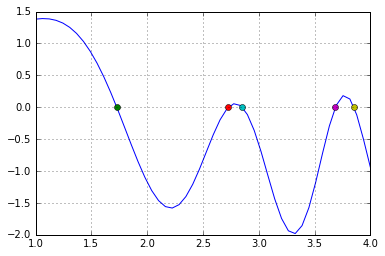

In [29]:
x=linspace(1,4)
plot(x,f(x))
plot([1.72764202279],[0],'o')
plot([2.72764202331],[0],'o')
plot([2.85344215089],[0],'o')
plot([3.68673613866],[0],'o')
plot([3.85344215455],[0],'o')
grid(True)
show()

In [30]:
raiz_osc(f,0,2*pi)


1 1.72764068413
2 2.72764659424
3 2.85344625244
4 3.68673006668
5 3.85344403992
6 4.3797437851
7 4.68673441773
8 4.98589956055
9 5.3797459198
10 5.53143518677
11 5.9858959732
12 6.03157216797


6.031572167968031

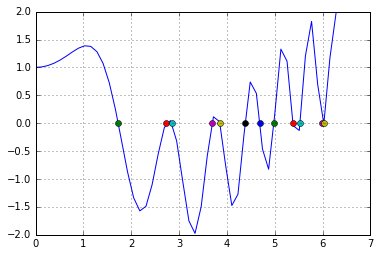

In [31]:
x=linspace(0,2*pi)
plot(x,f(x))
plot([1.72764202279],[0],'o')
plot([2.72764202331],[0],'o')
plot([2.85344215089],[0],'o')
plot([3.68673613866],[0],'o')
plot([3.85344215455],[0],'o')
plot([4.37974844549],[0],'o')
plot([4.68673614923],[0],'o')
plot([4.9859028609],[0],'o')
plot([5.37974844674],[0],'o')
plot([5.53144389932],[0],'o')
plot([5.98590286261],[0],'o')
plot([6.03157720845],[0],'o')
grid(True)
show()

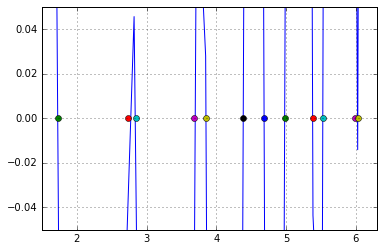

In [13]:
plot(x,f(x))
plot([1.72764202279],[0],'o')
plot([2.72764202331],[0],'o')
plot([2.85344215089],[0],'o')
plot([3.68673613866],[0],'o')
plot([3.85344215455],[0],'o')
plot([4.37974844549],[0],'o')
plot([4.68673614923],[0],'o')
plot([4.9859028609],[0],'o')
plot([5.37974844674],[0],'o')
plot([5.53144389932],[0],'o')
plot([5.98590286261],[0],'o')
plot([6.03157720845],[0],'o')
xlim([1.5,6.3]),ylim([-.05,.05])
grid(True)
show()